In [6]:
import os
os.getcwd()

'C:\\Users\\RINKU ISALKAR\\Downloads'

In [5]:
os.chdir("C:\\Users\\RINKU ISALKAR\\Downloads")

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming you have already loaded the 'advertising' DataFrame

X = advertising[['TV', 'Radio', 'Newspaper']]
y = advertising['Sales']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean squared error: {mse}')

# Deploy the model
def predict_sales(TV, Radio, Newspaper):
    """Predicts sales based on marketing spend."""
    return model.predict([[TV, Radio, Newspaper]])[0]

# Example usage
predicted_sales = predict_sales(10000, 5000, 2500)
print(f'Predicted sales for $10,000 on TV, $5,000 on Radio, and $2,500 on Newspaper: {predicted_sales}')


Mean squared error: 2.4040674447118864
Predicted sales for $10,000 on TV, $5,000 on Radio, and $2,500 on Newspaper: 1060.439879648502


C:\Users\RINKU ISALKAR\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
advertising.isnull().sum()*100/advertising.shape[0]
                                            

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

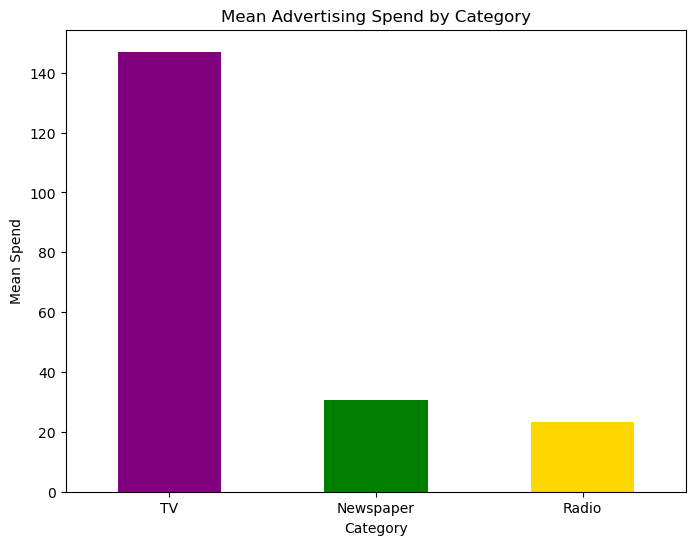

In [23]:


# Group the data by category and calculate the mean for each category
category_means = advertising[['TV', 'Newspaper', 'Radio']].mean()

# Create a bar graph
plt.figure(figsize=(8, 6))
category_means.plot(kind='bar', color=['purple', 'green', 'gold'])
plt.title('Mean Advertising Spend by Category')
plt.xlabel('Category')
plt.ylabel('Mean Spend')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()





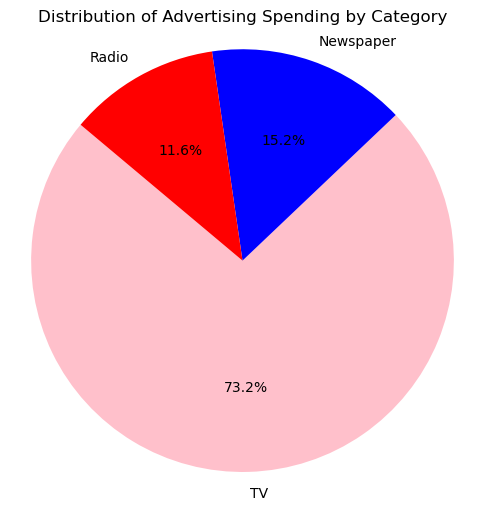

In [27]:
import matplotlib.pyplot as plt

# Calculate the total spending for each category
category_totals = advertising[['TV', 'Newspaper', 'Radio']].sum()

# Labels for the pie chart
labels = category_totals.index

# Values for the pie chart
values = category_totals.values

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=['pink', 'blue', 'red'])
plt.title('Distribution of Advertising Spending by Category')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


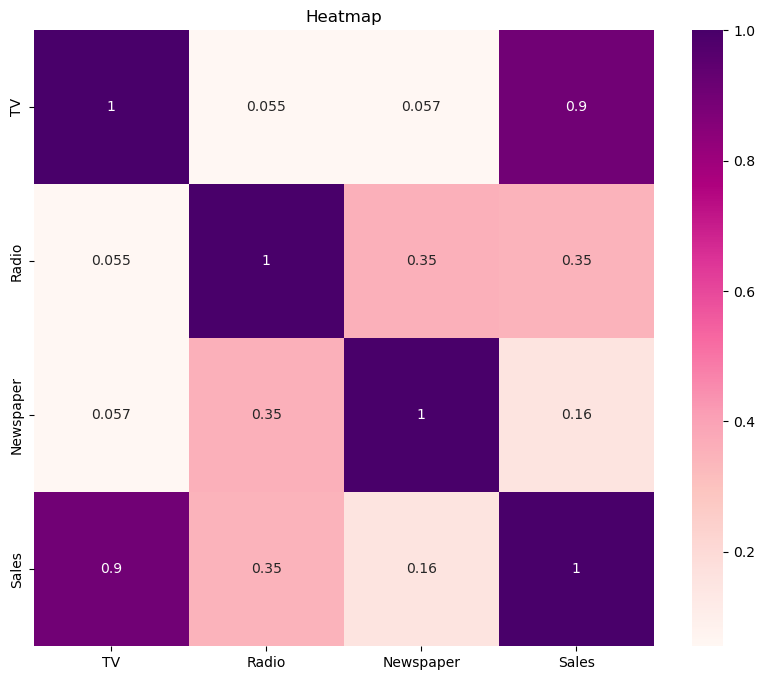

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(advertising.corr(), cmap="RdPu", annot=True)
plt.title('Heatmap')
plt.show()

In [46]:
X = advertising['Radio']
y = advertising['Sales']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [48]:
X_train.head()

74     24.6
3      41.3
185    45.1
26     29.3
90      4.9
Name: Radio, dtype: float64

In [49]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [50]:
import statsmodels.api as sm

In [51]:
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [52]:
lr.params

const    12.164674
Radio     0.123920
dtype: float64

In [53]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     17.38
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           5.36e-05
Time:                        00:03:45   Log-Likelihood:                -431.24
No. Observations:                 140   AIC:                             866.5
Df Residuals:                     138   BIC:                             872.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1647      0.816     14.914      0.0

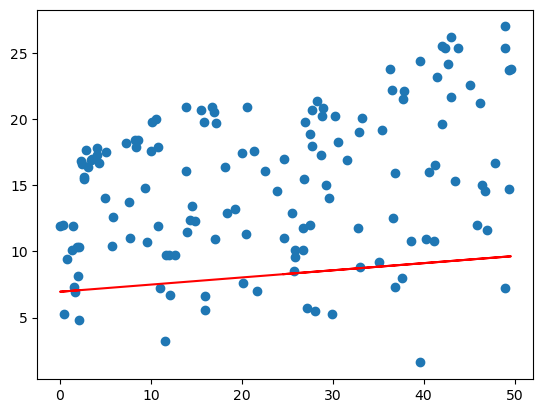

In [54]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

In [55]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Windows\Temp\ipykernel_20184\3003513444.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


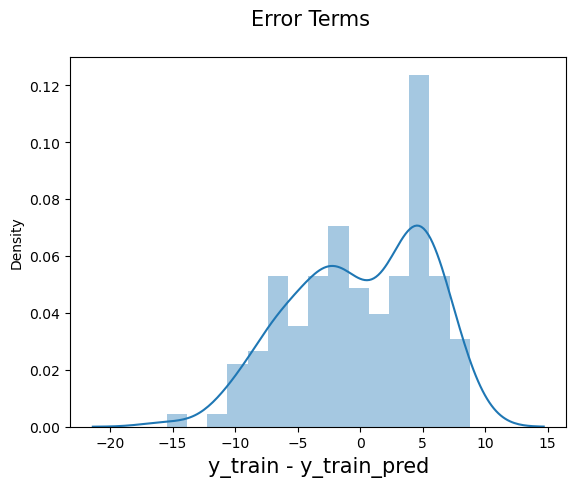

In [56]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

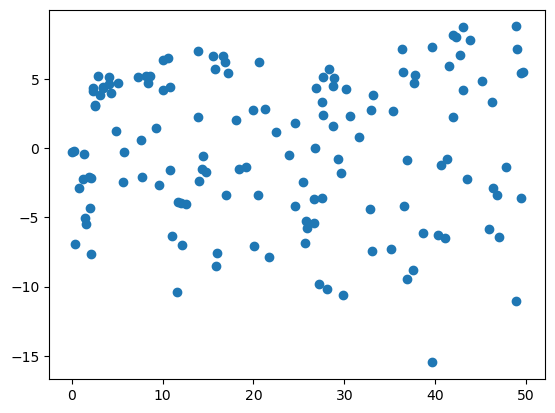

In [57]:
plt.scatter(X_train,res)
plt.show()

In [58]:
X_test_sm = sm.add_constant(X_test)

y_pred = lr.predict(X_test_sm)

In [59]:
y_pred.head()

126    16.985157
104    16.415126
99     17.332133
92     16.315990
111    16.873629
dtype: float64

In [60]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
np.sqrt(mean_squared_error(y_test, y_pred))

4.07311786277614

In [62]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.1541334154583961

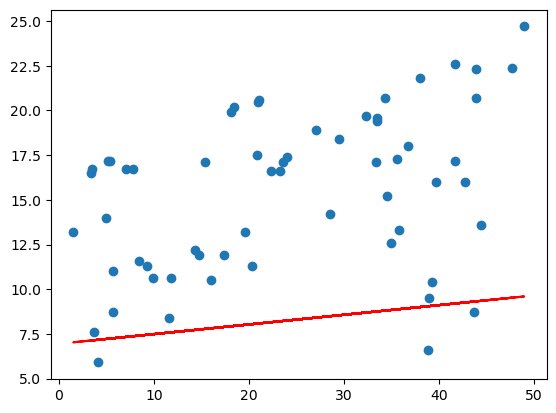

In [63]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

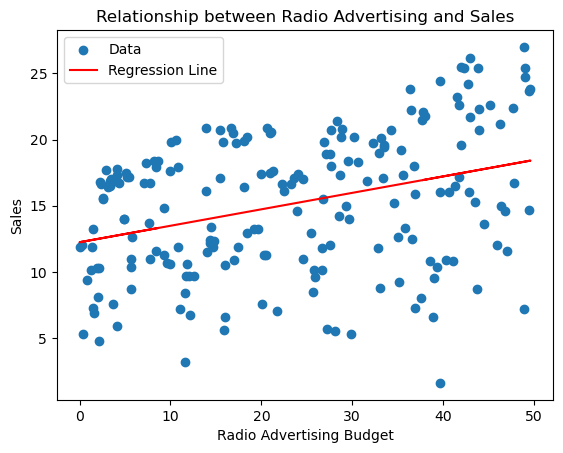

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     27.57
Date:                Sat, 23 Sep 2023   Prob (F-statistic):           3.88e-07
Time:                        00:11:19   Log-Likelihood:                -603.18
No. Observations:                 200   AIC:                             1210.
Df Residuals:                     198   BIC:                             1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.2357      0.653     18.724      0.0

In [66]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the advertising dataset
advertising = pd.read_csv('advertising.csv')

# Define your dependent variable (y) and independent variable (X)
X = advertising['Radio']  # Independent variable
y = advertising['Sales']  # Dependent variable

# Add a constant term to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the simple linear regression model
model = sm.OLS(y, X).fit()

# Create a scatter plot of the data points and overlay the regression line
plt.scatter(X['Radio'], y, label='Data')
plt.plot(X['Radio'], model.predict(X), color='red', label='Regression Line')
plt.xlabel('Radio Advertising Budget')
plt.ylabel('Sales')
plt.legend()
plt.title('Relationship between Radio Advertising and Sales')
plt.show()

# Display regression summary
print(model.summary())


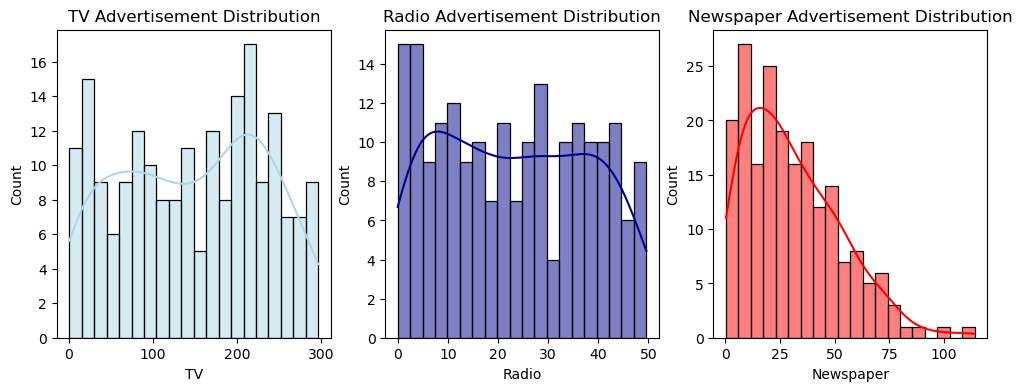

In [71]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(advertising['TV'], bins=20, kde=True, color='lightblue')
plt.title('TV Advertisement Distribution')

plt.subplot(132)
sns.histplot(advertising['Radio'], bins=20, kde=True, color='darkblue')
plt.title('Radio Advertisement Distribution')

plt.subplot(133)
sns.histplot(advertising['Newspaper'], bins=20, kde=True, color='red')
plt.title('Newspaper Advertisement Distribution')

plt.show()
